# Deep Learning Model
We are aiming to predict the Lip_norm parameter based on the binary positions and full embedding of a peptide.

## Dataset preparation
Read the dataframed with the embeddings and binary positions, and then format them.

In [1]:
import json
import pickle
import pandas as pd

# Get the embedding 1
with open('data/embeddings_test_1.pkl', 'rb') as file:
    embeddings = pickle.load(file)

# Get the embedding 2
# with open('data/embeddings_test_2.pkl', 'rb') as file:
#     embeddings_2 = pickle.load(file)

# # Get the embedding 3
# with open('data/embeddings_test_3.pkl', 'rb') as file:
#     embeddings_3 = pickle.load(file)

# # Get the embedding 4
# with open('data/embeddings_test_4.pkl', 'rb') as file:
#     embeddings_4 = pickle.load(file)

# Concatenate the embeddings
# embeddings = pd.concat([embeddings_1])
# 

embeddings.set_index('Uniprot_ID', inplace=True)
embeddings = embeddings.drop(columns=['full_sequence'])

In [2]:
embeddings

,full_embedding
Uniprot_ID,
P15703,"[[0.10351670533418655, -0.04619598016142845, 0..."
P38174,"[[0.017678968608379364, -0.011685207486152649,..."
P26637,"[[0.04360557720065117, 0.039450906217098236, 0..."
P06169,"[[0.06486686319112778, -0.018988797441124916, ..."
P00359,"[[0.05060335993766785, -0.002109627239406109, ..."
...,...
P40991,"[[0.05226866900920868, -0.04464501142501831, 0..."
P53633,"[[0.044984687119722366, -0.01916404627263546, ..."
Q01217,"[[0.08891955018043518, -0.039793942123651505, ..."


In [3]:
import numpy as np

# Creating trimmed embeddings
trimmed_embeddings = [np.array(embedding)[1:-1, :] for embedding in embeddings['full_embedding']]
trimmed_embeddings_df = pd.DataFrame({'embeddings': trimmed_embeddings}, index=embeddings.index)

In [4]:
trimmed_embeddings_df

,embeddings
Uniprot_ID,
P15703,"[[-0.0014747204259037971, -0.04175397753715515..."
P38174,"[[0.09441959857940674, 0.05087737366557121, -0..."
P26637,"[[0.07177527993917465, 0.05565423518419266, 0...."
P06169,"[[0.05485401302576065, 0.05323461815714836, -0..."
P00359,"[[0.0364735871553421, -0.02804701030254364, -0..."
...,...
P40991,"[[0.10278788208961487, 0.003414804581552744, -..."
P53633,"[[0.05683088302612305, -0.03139161318540573, -..."
Q01217,"[[0.13987456262111664, -0.090286985039711, -0...."


In [5]:
trimmed_size_embeddings_df = trimmed_embeddings_df[trimmed_embeddings_df['embeddings'].apply(lambda x: x.shape[0]) < 1000]

In [6]:
trimmed_size_embeddings_df

,embeddings
Uniprot_ID,
P15703,"[[-0.0014747204259037971, -0.04175397753715515..."
P38174,"[[0.09441959857940674, 0.05087737366557121, -0..."
P06169,"[[0.05485401302576065, 0.05323461815714836, -0..."
P00359,"[[0.0364735871553421, -0.02804701030254364, -0..."
P37292,"[[0.1292525678873062, 0.10085765272378922, -0...."
...,...
P40991,"[[0.10278788208961487, 0.003414804581552744, -..."
P53633,"[[0.05683088302612305, -0.03139161318540573, -..."
Q01217,"[[0.13987456262111664, -0.090286985039711, -0...."


In [7]:
max_length = 1000

# Padding embeddings
padded_embeddings = [np.pad(embedding, ((0, max_length - embedding.shape[0]), (0, 0)), mode='constant', constant_values=0)
                     for embedding in trimmed_size_embeddings_df['embeddings']]

In [8]:
padded_embeddings_df = pd.DataFrame({'embeddings': padded_embeddings}, index=trimmed_size_embeddings_df.index)

In [9]:
# Get the dataset
df = pd.read_csv('data/OsmoticStress_with_binary_positions_padded.csv')
df['Binary_Positions'] = df['Binary_Positions'].apply(json.loads)
df['Padded_Binary_Positions'] = df['Padded_Binary_Positions'].apply(json.loads)
df.drop(columns=['full_sequence', 'Peptide_sequence', "Binary_Positions"], inplace=True)
#df["full_sequence"]= df["full_sequence"].astype(str)
df.set_index('Uniprot_ID', inplace=True)

df

,Log2FC(LiP_norm),Padded_Binary_Positions
Uniprot_ID,,
P15703,-2.176707,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,0.285029,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,-0.498240,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,0.348193,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,-0.434615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
P38887,-0.008441,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P53093,0.006678,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Q04772,-0.015149,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."


In [10]:
dataset = df.merge(padded_embeddings_df, left_index=True, right_index=True)

In [11]:
# We can see that we have only the columns: 'Lip_norm', 'Binary Position', 'Embeddings'
dataset.head()

,Log2FC(LiP_norm),Padded_Binary_Positions,embeddings
Uniprot_ID,,,
O13516,4.378006,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.345066,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.458429,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.607978,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,4.070368,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."


In [12]:
import re

# Both columns are strings, we need to convert them to lists of integers so we can use them later
def convert_to_list(number_string):
    cleaned_string = re.sub(r"[^\d,\s]", "", number_string)
    return list(map(int, cleaned_string.split(',')))

#dataset['Binary_Positions'] = dataset['Binary_Positions'].apply(convert_to_list)

In [13]:
# def matrix_shape_lists(x):
#    return len(x), len(x[0])
# 
# dataset['Binary_Positions_shape'] = dataset['Binary_Positions'].apply(len)
# dataset['full_embedding_shape'] = dataset['embeddings'].apply(matrix_shape_lists)

In [14]:
dataset

,Log2FC(LiP_norm),Padded_Binary_Positions,embeddings
Uniprot_ID,,,
O13516,4.378006,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.345066,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.458429,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.607978,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,4.070368,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
...,...,...,...
Q6Q547,-0.050568,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.03893417492508888, -0.04581452161073685, -..."
Q6Q547,0.543480,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[[0.03893417492508888, -0.04581452161073685, -..."
Q6Q547,-0.153268,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.03893417492508888, -0.04581452161073685, -..."


In [16]:
import torch
embeddings_tensor = torch.Tensor(np.array(dataset['embeddings'].tolist(), dtype=np.float16))
binary_positions_tensor = torch.Tensor(np.array(dataset['Padded_Binary_Positions'].tolist(), dtype=np.float16))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
embeddings_tensor = embeddings_tensor.to(device)
binary_positions_tensor = binary_positions_tensor.to(device)

X = embeddings_tensor + binary_positions_tensor

lip_norm_tensor = torch.Tensor(np.array(dataset['Lip_norm'].tolist(), dtype=np.float16)).to(device)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 63073280000 bytes. Buy new RAM!


In [ ]:
# clean up memory
del embeddings
del df


## Creating combined embedding
Now that we have the dataframe processed, we wil first create the embeddings of the binary position, and then sum them up with the peptide embeding.

In [ ]:
# import numpy as np
# trimmed_embeddings = [np.array(embedding)[1:-1, :] for embedding in dataset['full_embedding']]

NameError: name 'dataset' is not defined

In [ ]:
# max_length = max(embedding.shape[0] for embedding in trimmed_embeddings)
# print(max_length)

707


In [ ]:
# import torch
# import torch.nn as nn
# import numpy as np
# 
# padded_embeddings = [np.pad(embedding, ((0, max_length - embedding.shape[0]), (0, 0)), 
#                              mode='constant', constant_values=0)
#                      for embedding in trimmed_embeddings]
# padded_embeddings_array = np.array(padded_embeddings, dtype=np.float32)
# full_embedding = torch.tensor(padded_embeddings_array)

In [ ]:
# full_embedding.shape

torch.Size([1000, 707, 1280])

In [ ]:
# binary_positions = dataset['Binary_Positions']
# padded_binary_positions = [
#     np.pad(position, (0, max_length - len(position)), 
#            mode='constant', constant_values=0)
#     for position in binary_positions
# ]
# padded_binary_positions_array = np.array(padded_embeddings, dtype=np.float32)
# full_binary_positions = torch.tensor(padded_embeddings_array)

In [ ]:
# full_binary_positions.shape

torch.Size([1000, 707, 1280])

In [ ]:
# combined_embeddings = full_embedding + full_binary_positions

In [ ]:
## Select the target variable Lip_norm as the output y
#y_list = np.array(dataset['Log2FC(LiP_norm)'])
#y = torch.tensor(y_list, dtype=torch.float32)

In [ ]:
#y.shape

torch.Size([1000])

## Model Training
Now that we have both input and target data, we can create our model.

In [ ]:
#import torch

#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
print(device)

cuda


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import copy
from torch.utils.data import TensorDataset, DataLoader, random_split

dataset = TensorDataset(combined_embeddings_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Model definition based on suggestion
class PeptideRegressor(nn.Module):
    def __init__(self, input_dim, num_heads, dropout_rate):
        super(PeptideRegressor, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout_rate)
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(input_dim, 1) 

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        transposed = attn_output.transpose(1, 2)
        pooled = self.pooling(transposed)
        flattened = pooled.squeeze(-1)
        output = self.fc(flattened)
        return output


# Initialize the model
input_dim = 1280
num_heads = 16    # number of attention heads
dropout_rate = 0.1
model = PeptideRegressor(input_dim=input_dim, num_heads=num_heads, dropout_rate=dropout_rate).to(device)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training settings
n_epochs = 10
batch_size = 64
best_val_loss = float('inf')
train_losses_avg = []
val_losse_avg = []

# Training loop
for epoch in range(n_epochs):
    model.train()
    train_losses = []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    train_losses_avg.append(sum(train_losses) / len(train_losses))
    print(f'Epoch {epoch+1}, Train Loss: {sum(train_losses) / len(train_losses)}')

    model.eval()
    val_losses = []
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        with torch.no_grad():
            y_pred = model(X_batch)
            mse = loss_fn(y_pred, y_batch.unsqueeze(1))
            mae = nn.L1Loss()(y_pred, y_batch.unsqueeze(1))
            val_losses.append(mse.item())
    avg_val_loss = sum(val_losses) / len(val_losses)
    val_losse_avg.append(avg_val_loss)
    print(f'Epoch {epoch+1}, Test MSE: {avg_val_loss}')
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = copy.deepcopy(model.state_dict())

Epoch 1, Train Loss: 0.7179364266822923
Epoch 1, Test MSE: 0.4283900058695248
Epoch 2, Train Loss: 0.6948960235096374
Epoch 2, Test MSE: 0.418760678597859
Epoch 3, Train Loss: 0.6798290317913271
Epoch 3, Test MSE: 0.4106028899550438
Epoch 4, Train Loss: 0.6102886292731987
Epoch 4, Test MSE: 0.404132144259555
Epoch 5, Train Loss: 0.5708547827770125
Epoch 5, Test MSE: 0.3953186071344784
Epoch 6, Train Loss: 0.5526599532590722
Epoch 6, Test MSE: 0.3920303136110306
Epoch 7, Train Loss: 0.5444910461610218
Epoch 7, Test MSE: 0.3941916488111019
Epoch 8, Train Loss: 0.5496487129690513
Epoch 8, Test MSE: 0.38942363219601767
Epoch 9, Train Loss: 0.5438963350541187
Epoch 9, Test MSE: 0.38318345562687944
Epoch 10, Train Loss: 0.5396174898125091
Epoch 10, Test MSE: 0.3861110529729298


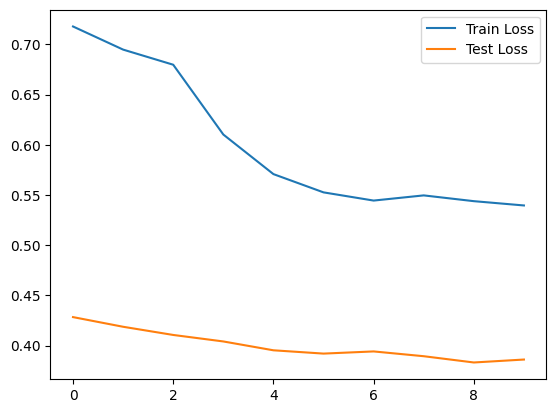

In [9]:
# # Visualize the training process
import matplotlib.pyplot as plt

plt.plot(train_losses_avg, label='Train Loss')
plt.plot(val_losse_avg, label='Test Loss')
plt.legend()
plt.show()
